In [205]:
# Import pandas, numpy, matlotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in the data from the csv file
housing = pd.read_csv(r"C:\Users\user\OneDrive\Skrivbord\Pythonprogrammering och AI utveckling\Pythonprogrammering och AI strategi\kunskapskontroll_2\housing.csv", delimiter=";")

# Prints out DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [203]:
# Information about the housing.csv file
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# So around 200 missing values on the csv file

Text(0.5, 1.0, 'Plot Bar of Missing Values')

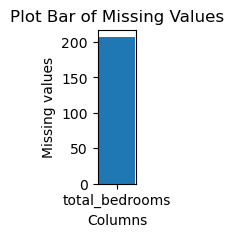

In [249]:
# Counts the missing value on each column
missing = housing.isnull().sum()
# Filters out all columns with no missing values
missing = missing[missing > 0]

# Creates a Figure
fig, ax = plt.subplots(figsize=(0.5, 2))
# Creates a Bar Plot
ax.bar(missing.index, missing.values)

# Sets up the Title, X and Y labels
ax.set_xlabel("Columns")
ax.set_ylabel("Missing values")
ax.set_title("Plot Bar of Missing Values")

In [243]:
# Statistics for each numerical column in the csv file
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# The max value on median_house_value reaches 500k, i think that is intressting and would look into it more

Text(0.5, 1.0, 'Histogram of Median House Value')

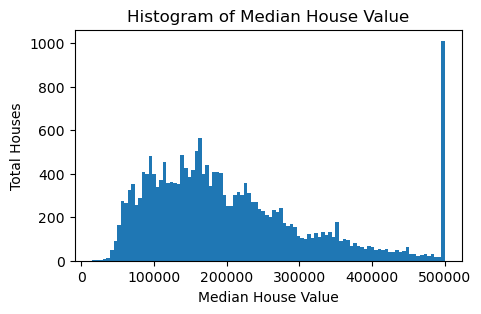

In [296]:
# Creates a Figure
fig, ax = plt.subplots(figsize=(5, 3))
# Creates a Histogram
ax.hist(housing["median_house_value"], bins=100)
# Sets up Title, X and Y labels
ax.set_xlabel("Median House Value")
ax.set_ylabel("Total Houses")
ax.set_title("Histogram of Median House Value")

# I now see that the 500k mark stands out from the other houses
* Lets check where the houses that costs around the 500k mark are located.

Text(0.5, 1.0, 'Houses that costs around 500k')

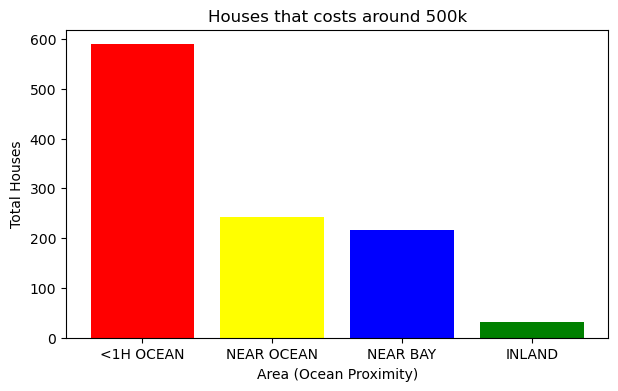

In [287]:
# Filters and select the houses between 480k and 510k
house_cost_high = housing[(housing["median_house_value"] >= 480000) & (housing["median_house_value"] <= 510000)]

# Counts the houses by Area
area = house_cost_high["ocean_proximity"].value_counts()

# Creates a Figure
fig, ax = plt.subplots(figsize=(7, 4))

# Creates a Bar plot with colours
colors = ["red", "yellow", "blue", "green"]
ax.bar(area.index, area.values, color=colors)

# Sets up the Title, X and Y labels
ax.set_xlabel("Area (Ocean Proximity)")
ax.set_ylabel("Total Houses")
ax.set_title("Houses that costs around 500k")

# Analysis of Houses Around the 500k Mark
* From the Histogram, i observed that the 500,000 mark stood out significantly.
* To understand this better, i analyzed where these houses are located. The results are as follows:

* Within 1 hour to the ocean: Approximately 590 houses

* Near the ocean: Approximately 230 houses

* Near the bay: Approximately 210 houses

* Inland: Approximately 30 houses

# And now for the final step i want to see where exactly on a map this houses are located

In [218]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------------------- -------------------- 7.9/16.2 MB 40.7 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 32.8 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 6.3 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 6.3 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 5.6 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 5.6 MB/s

In [228]:
!pip install contextily

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   --- ------------------------------------ 2.1/25.4 MB 13.1 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   ------ --------------------------------- 4.2/25.4 MB 11.0 MB/s eta 0:00:02
   --------- ------------------------------ 6.3/25.4 MB 2.8 MB/s eta 0:00:07
   ----------- ---------------------------- 7.3/25.4 MB 3.1 MB/s eta 0:00

In [230]:
# Import geopandas and contextily
import geopandas as gpd
import contextily as ctx

Text(0.5, 1.0, 'Houses that costs around 500k')

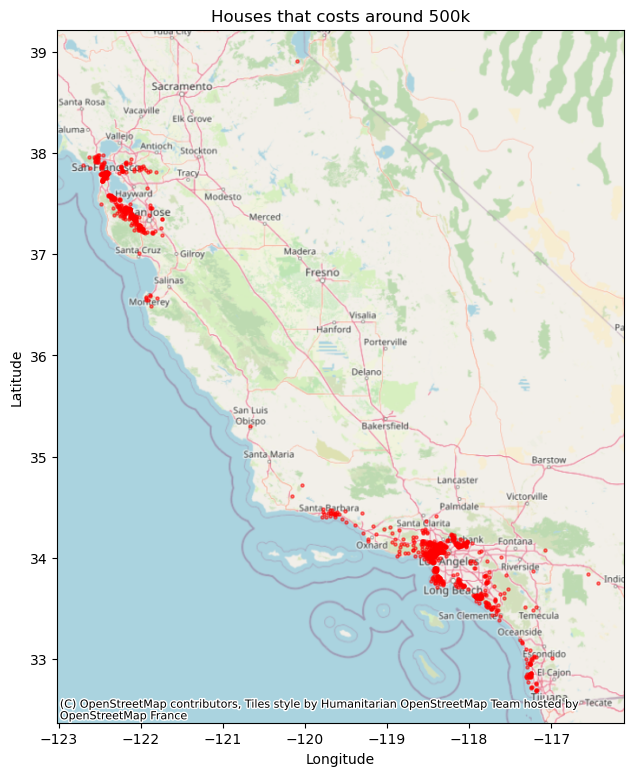

In [289]:
# Create GeoDataFrame and set the Coordinate Reference System(CRS) to WGS84 (EPSG:4326)
gdf = gpd.GeoDataFrame(house_cost_high, geometry=gpd.points_from_xy(house_cost_high.longitude, house_cost_high.latitude))
gdf.set_crs(epsg=4326, inplace=True)

# Creates a Figure and plots it
fig, ax = plt.subplots(figsize=(11, 9))
gdf.plot(ax=ax, markersize=5, color="red", alpha=0.5)

# Basemap tiles
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Set Titles, X and Y labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Houses that costs around 500k")

# Final Results
* The main areas where the houses around the 500,000 mark are:
* Los Angeles, San Jose, San Francisco, Santa Barbara and San Diego

# 1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
* Pandas kunskapskontroll var lite mer utmanande än NumPy och Matplotlib då det tog lite längre tid att hitta lösningar, men det jag verkligen fastna på var kartan när jag gjorde kunskapskontroll 3. Jag kunde inte få kartan att visa sig och förstog inte varför. Efter att ha importerat in GeoPandas för att få kartan att visa sig så gjorde den inte det, jag kunde bara se röda prickar och en vit bakgrundsbild. Satt fast här ett tag och till slut fick jag ett svar från co pilot att ibland så laddas inte kartan in och då behöver man använda Contextily som jag då ladda ner med pip install och la in extra koden som den hade skrivit till mig samt läst lite om det på denna sidan https://contextily.readthedocs.io/en/latest/index.html . Efter det så körde jag koden och kartan visades och jag var nöjd med vad jag hade åstadkommit.

# 2. Vilket betyg anser du att du ska ha och varför? 
* Jag har genomfört alla kunskapskontroller och lärt mig väldigt. Jag hoppas vi fortsätter att lära oss om dessa bibliotek då jag insett hur stora dom är och hur mycket man kan göra. Det finns ingen chans att jag kommer lära mig dessa bibliotek fullt ut på 2-3 månader utan det kommer ta lång tid men det är en början för att förstå hur man ska hitta lösningar. Jag kommer självklart försöka få högsta betyg, men det är du som avgör.

# 3. Något du vill lyfta fram till Antonio? 
* Då vi läst mycket om Python så hade en till uppgift som kunskapskontroll varit något att tänka på. Uppgiften kan tillexempel vara skapa ett Bingo spel eller något annat kul. Jag har själv gjort ett Bingo spel innan i python som jag kan ladda upp och visa dig, följ instruktionerna i terminalen när du kör den :)